In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import os
print(os.listdir("../Downloads/uk-road-safety-accidents-and-vehicles"))

['Vehicle_Information.csv', 'Accident_Information.csv']


In [14]:


cols_keep = ['Accident_Severity', 'Date','Time', 'Latitude','Longitude',
             'Local_Authority_(District)', 'Local_Authority_(Highway)',
            'LSOA_of_Accident_Location', 'Number_of_Casualties', "1st_Road_Number","2nd_Road_Number"]



In [2]:


accidents1 = pd.read_csv('../../data/accidents_2009_to_2011.csv',#nrows=12345,
                 parse_dates=[['Date', 'Time']],keep_date_col=True)
accidents2 = pd.read_csv('../../data/accidents_2012_to_2014.csv',#nrows=12345,
                 parse_dates=[['Date', 'Time']],keep_date_col=True)

accidents = pd.concat([accidents1, accidents2])

accidents.head()


/home/tanvi/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date_Time,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,01/01/2009 15:11,200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
1,05/01/2009 10:59,200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
2,04/01/2009 14:19,200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009
3,05/01/2009 08:10,200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,1,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009
4,06/01/2009 17:25,200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009


In [3]:

data = []
[data.append(accidents[(accidents.Year == year)]) for year in range(2009, 2015)]


[None, None, None, None, None, None]

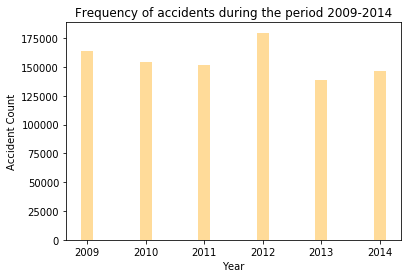

In [5]:
## Has accidents decreased over the years ?
years = [2009, 2010, 2011, 2012, 2013, 2014]

accident_counts = [len(yearly_data) for yearly_data in data]

## How has accidents varied over the years
fig = plt.figure()
plt.bar(years, accident_counts, align='center', alpha=0.4, color = 'orange', width=0.2)
#plt.bar(y_pos, performance, 

plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Frequency of accidents during the period 2009-2014')

plt.show()

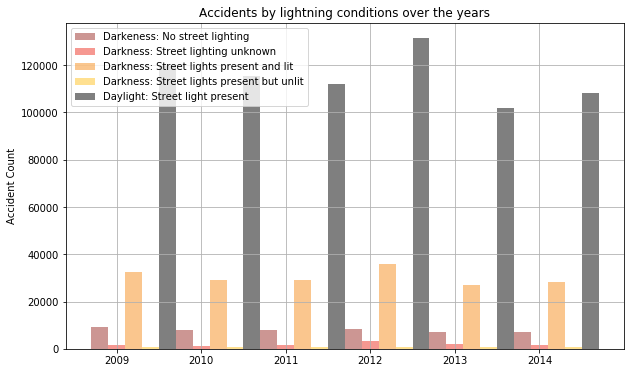

In [7]:
years = [2009, 2010, 2011, 2012, 2013, 2014]
light_conditions = ['Darkeness: No street lighting','Darkness: Street lighting unknown',
                    'Darkness: Street lights present and lit', 'Darkness: Street lights present but unlit',
                    'Daylight: Street light present']

light_conditions_grouped_by_year = [data[i].groupby(['Light_Conditions']).size().tolist()
                                            for i in range(len(data))]

ys = [[row[j] for row in light_conditions_grouped_by_year] for j in range(5)]

items = pd.unique(accidents.Light_Conditions).tolist()
width = 0.2
pos = list(range(len(years))) 

fig, ax = plt.subplots(figsize=(10,6))
plt.bar(pos,ys[0], width, alpha=0.5, color='#9b2f29', label=items[0]) 
plt.bar([p + width for p in pos], ys[1],width, alpha=0.5, color='#EE3224', label=items[1]) 
plt.bar([p + width*2 for p in pos], ys[2], width, alpha=0.5, color='#F78F1E', label=items[2]) 
plt.bar([p + width*3 for p in pos], ys[3], width, alpha=0.5, color='#FFC222', label=items[3]) 
plt.bar([p + width*4 for p in pos], ys[4], width, alpha=0.5, color='#000000', label=items[4]) 

ax.set_ylabel('Accident Count')
ax.set_title('Accidents by lightning conditions over the years')
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(years)

plt.legend(light_conditions, loc='upper left')

plt.grid()
plt.show()


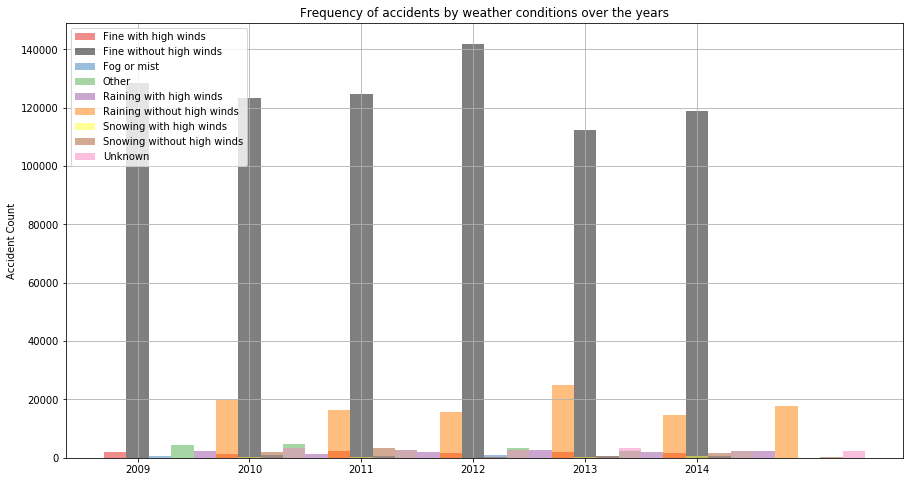

In [9]:


weather = ['Fine with high winds', 'Fine without high winds', 'Fog or mist', 'Other', 'Raining with high winds', 
         'Raining without high winds', 'Snowing with high winds', 'Snowing without high winds', 'Unknown']                       

weather_grouped_by_year = [data[i].groupby(['Weather_Conditions']).size().tolist() for i in range(len(data))]
ys = [[row[j] for row in weather_grouped_by_year] for j in range(9)]


width = 0.20
pos = list(range(len(years))) 

import pylab

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(pos,ys[0], width, alpha=0.5, color='#e41a1c', label=weather[0]) 
plt.bar([p + width for p in pos], ys[1],width, alpha=0.5, color='#000000', label=weather[1]) 
plt.bar([p + width*2 for p in pos], ys[2], width, alpha=0.5, color='#377eb8', label=weather[2]) 
plt.bar([p + width*3 for p in pos], ys[3], width, alpha=0.5, color='#4daf4a', label=weather[3]) 
plt.bar([p + width*4 for p in pos], ys[4], width, alpha=0.5, color='#984ea3', label=weather[4]) 
plt.bar([p + width*5 for p in pos], ys[5], width, alpha=0.5, color='#ff7f00', label=weather[5]) 
plt.bar([p + width*6 for p in pos], ys[6], width, alpha=0.5, color='#ffff33', label=weather[6])
plt.bar([p + width*7 for p in pos], ys[7], width, alpha=0.5, color='#a65628', label=weather[7])
plt.bar([p + width*8 for p in pos], ys[8], width, alpha=0.5, color='#f781bf', label=weather[8])



ax.set_ylabel('Accident Count')
ax.set_title('Frequency of accidents by weather conditions over the years')
ax.set_xticks([p + 1 * width for p in pos])

#ax.set_yticks([40000, 80000, 120000, 140000, 160000])

# Set the labels for the x ticks
ax.set_xticklabels(years)


# Adding the legend and showing the plot
plt.legend(weather, loc='upper left')
plt.grid()
plt.show()



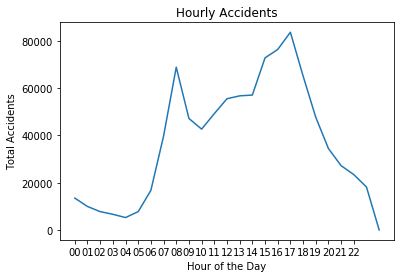

In [10]:

# What time of the day does most accidents occur
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
accidents['Hour'] = accidents['Time'].apply(lambda x : str(x).split(":")[0])
#hour_grouped = [accidents.groupby(['Hour'])]    
#accidents.groupby(['Hour']).size().plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Hour', fontsize=20);

hour_grouped = accidents.groupby('Hour').size()
plot_by_hour = hour_grouped.plot(title='Hourly Accidents',xticks=(range(0,23)))
plot_by_hour.set_xlabel('Hour of the Day')
plot_by_hour.set_ylabel('Total Accidents')

#accidents.describe()
#hour_grouped.sort_values(ascending=False)


import pylab


[101233, 133541, 140622, 140578, 141220, 153143, 123802]


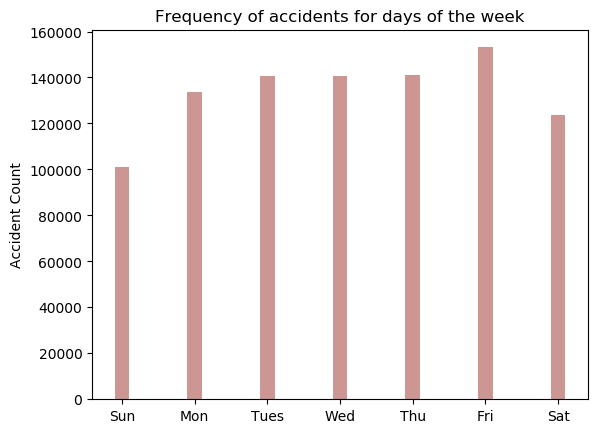

In [11]:
# what day of the week do m ost accidents occur?
day_of_week_grouped = list(accidents.groupby(['Day_of_Week']).size())


items = ('Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat')

print(day_of_week_grouped)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(items))
performance = day_of_week_grouped
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='#9b2f29', width=0.2)
plt.xticks(y_pos, items)
plt.ylabel('Accident Count')
plt.title('Frequency of accidents for days of the week')
 
plt.show()

[10888, 130207, 793044]


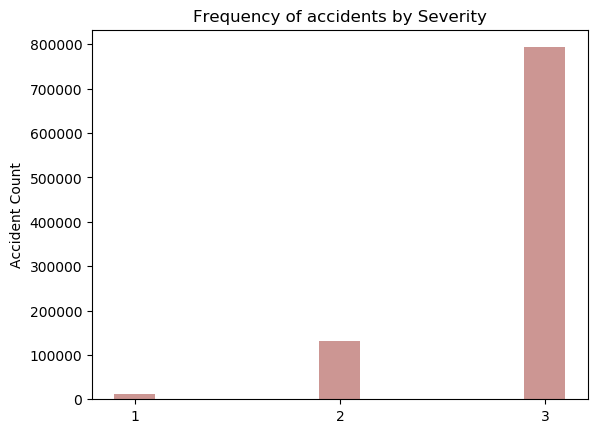

In [12]:
# what day of the week do m ost accidents occur?
severity_grouped = list(accidents.groupby(['Accident_Severity']).size())
severities = [1,2,3]

print(severity_grouped)
    
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(severities))
 
plt.bar(y_pos, severity_grouped, align='center', alpha=0.5, color='#9b2f29', width=0.2)
plt.xticks(y_pos, severities)
plt.ylabel('Accident Count')
plt.title('Frequency of accidents by Severity')
 
plt.show()


In [15]:
df2 = accidents[cols_keep]

df2.shape

(934139, 11)

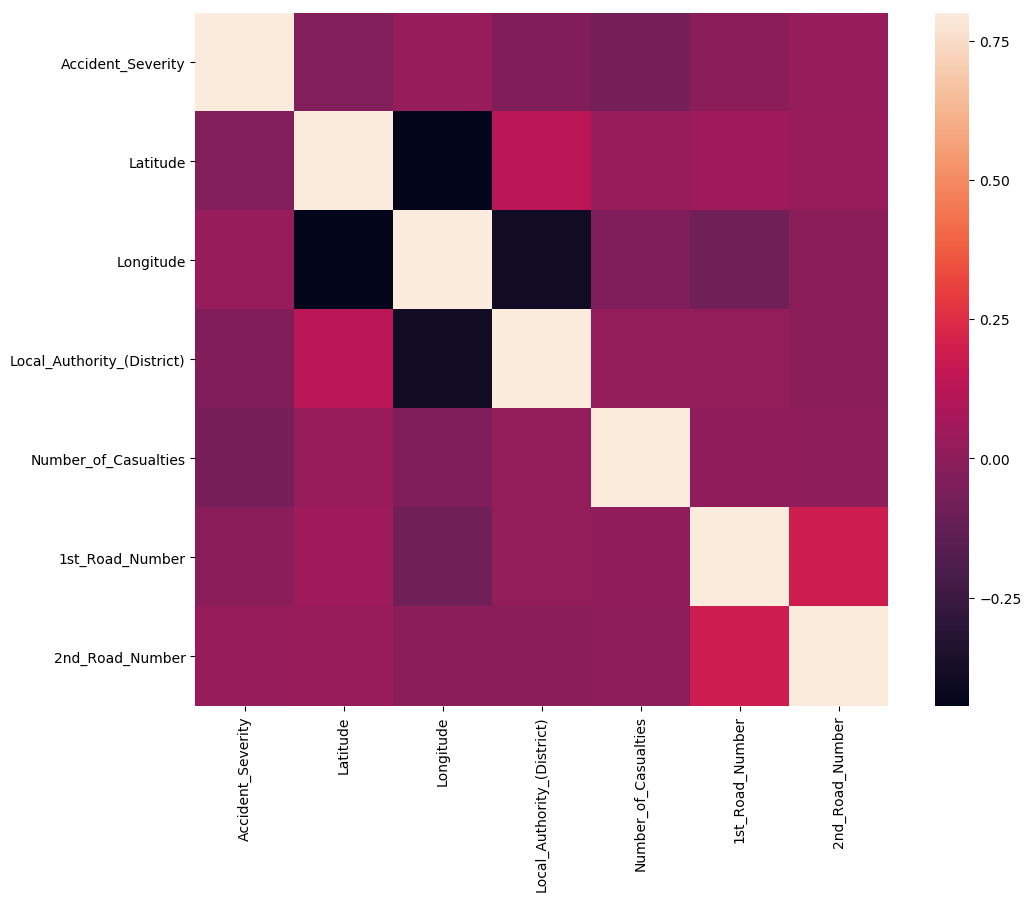

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

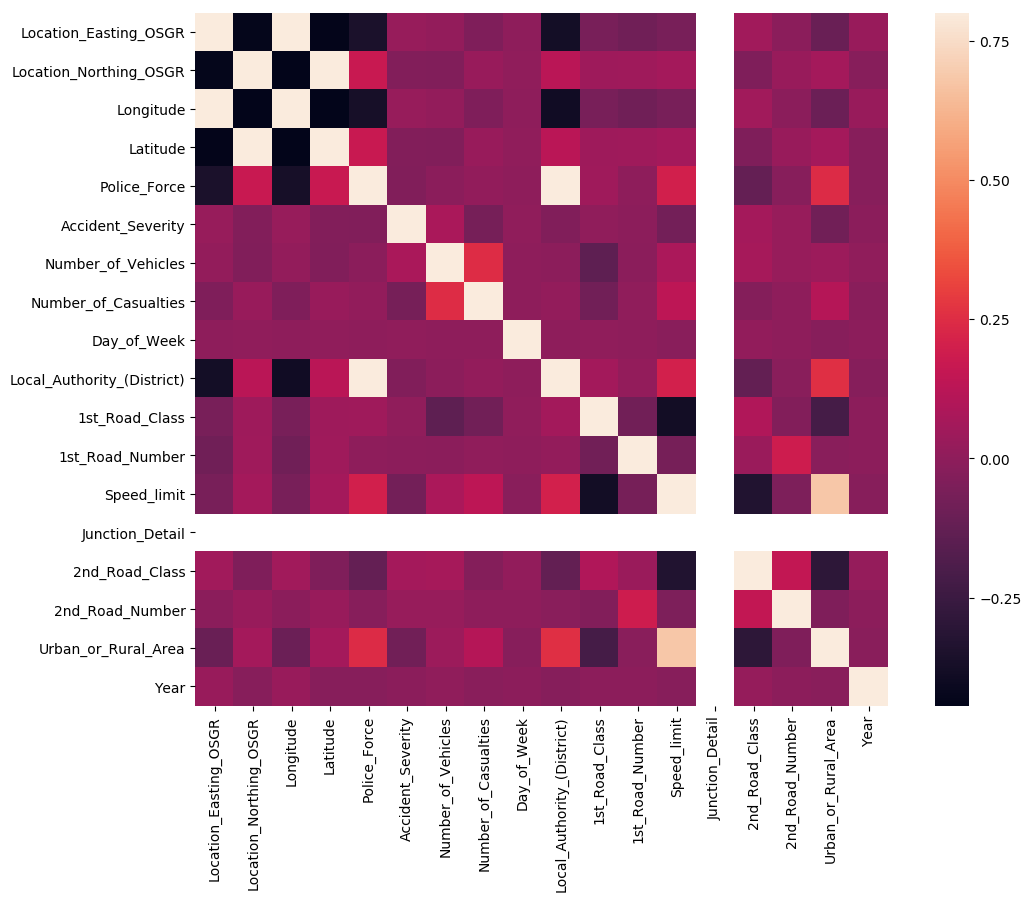

In [18]:
corrmat = accidents.corr()

f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax =.8,square = True);